## Etapa 1 - Preparação dos Dados

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lendo os dados
df = pd.read_csv('/datasets/games.csv')

In [3]:
# obtendo informacoes gerais dos dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB
,None


In [4]:
# obtendo as 10 primeiras linhas do DataFrame
print(df.head(10))

                        Name Platform  Year_of_Release         Genre  \
,0                 Wii Sports      Wii           2006.0        Sports   
,1          Super Mario Bros.      NES           1985.0      Platform   
,2             Mario Kart Wii      Wii           2008.0        Racing   
,3          Wii Sports Resort      Wii           2009.0        Sports   
,4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
,5                     Tetris       GB           1989.0        Puzzle   
,6      New Super Mario Bros.       DS           2006.0      Platform   
,7                   Wii Play      Wii           2006.0          Misc   
,8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
,9                  Duck Hunt      NES           1984.0       Shooter   
,
,   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
,0     41.36     28.96      3.77         8.45          76.0          8      E  
,1     29.08      3.58      6.81    

In [5]:
# imprimindo as colunas
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
,       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
,      dtype='object')


## Etapa 2 - Preparando os dados

In [6]:
# Percorrendo os cabeçalhos e convertendo tudo em minúsculos
df.columns = [col.lower() for col in df.columns]
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
,       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
,      dtype='object')


In [7]:
# conferindo os nomes das colunas
print(df.head(10))

                        name platform  year_of_release         genre  \
,0                 Wii Sports      Wii           2006.0        Sports   
,1          Super Mario Bros.      NES           1985.0      Platform   
,2             Mario Kart Wii      Wii           2008.0        Racing   
,3          Wii Sports Resort      Wii           2009.0        Sports   
,4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
,5                     Tetris       GB           1989.0        Puzzle   
,6      New Super Mario Bros.       DS           2006.0      Platform   
,7                   Wii Play      Wii           2006.0          Misc   
,8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
,9                  Duck Hunt      NES           1984.0       Shooter   
,
,   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
,0     41.36     28.96      3.77         8.45          76.0          8      E  
,1     29.08      3.58      6.81    

In [8]:
# convertendo year_of_release para int
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
print(df['year_of_release'])

0        2006
,1        1985
,2        2008
,3        2009
,4        1996
,         ... 
,16710    2016
,16711    2006
,16712    2016
,16713    2003
,16714    2016
,Name: year_of_release, Length: 16715, dtype: Int64


In [9]:
# Converter user_score para float, tratando possíveis valores inválidos como 'tbd'
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df['user_score'])

0        8.0
,1        NaN
,2        8.3
,3        8.0
,4        NaN
,        ... 
,16710    NaN
,16711    NaN
,16712    NaN
,16713    NaN
,16714    NaN
,Name: user_score, Length: 16715, dtype: float64


In [10]:
# Verificar valores ausentes após conversões
missing_values = df.isna().sum()
print(missing_values)

name                  2
,platform              0
,year_of_release     269
,genre                 2
,na_sales              0
,eu_sales              0
,jp_sales              0
,other_sales           0
,critic_score       8578
,user_score         9125
,rating             6766
,dtype: int64


In [11]:
# Calcular total de vendas
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(df['total_sales'])

0        82.54
,1        40.24
,2        35.52
,3        32.77
,4        31.38
,         ...  
,16710     0.01
,16711     0.01
,16712     0.01
,16713     0.01
,16714     0.01
,Name: total_sales, Length: 16715, dtype: float64


## Durante a preparação dos dados, algumas colunas precisaram ser convertidas para tipos mais adequados para análise. Abaixo estão as alterações realizadas e suas respectivas justificativas:
1. "year_of-release": estava em float foi convertida para int. Justificativa: O ano de lançamento deve ser representado como número inteiro, pois se trata de uma variável discreta. Foi utilizado Int64 ao invés de int padrão, pois esse tipo aceita valores ausentes.
2. "user_score": de object para float. Justificativa: A coluna continha valores numéricos em formato de texto (ex: '8.3') e também valores não numéricos como 'tbd' (to be determined). Esses valores foram convertidos para NaN e a coluna foi transformada em float64 para permitir operações estatísticas como médias, filtros e gráficos.

## Tratando valores ausentes
Durante a análise exploratória, identifiquei valores ausentes em diversas colunas. Abaixo explico minha abordagem, as possíveis causas e como lidar com o valor especial 'tbd'.
Optei por não preencher os valores ausentes nesse momento. Eles foram mantidos como NaN nas colunas relevantes, pois:
* Preenchimento artificial (com média, zero ou "desconhecido") pode distorcer os resultados, especialmente em análises estatísticas.
* A ausência de dados muitas vezes tem um significado real, e deve ser considerada na interpretação.
* Valores ausentes só serão tratados posteriormente se forem críticos para análises específicas (ex: remoção de linhas com NaN ao calcular médias ou correlações).
  
Possíveis razões para os valores estarem ausentes:
"critic_score": O jogo pode não ter sido avaliado por críticos oficiais.
"user_score": Faltam avaliações dos usuários ou o valor ainda não foi publicado.
"year_of_release": Pode ser um erro de registro ou jogo em pré-lançamento.
"rating": O jogo pode não ter sido classificado por órgão oficial (como ESRB).

Abreviação 'TBD' ("To Be Determined")
A coluna user_score continha o valor 'tbd', que significa "a ser determinado". Esses casos foram tratados da seguinte forma:
Substituí 'tbd' por NaN, pois representam valores ainda indefinidos e não podem ser usados como números.
Isso permite que a coluna seja convertida para float64 e analisada corretamente sem interferência.

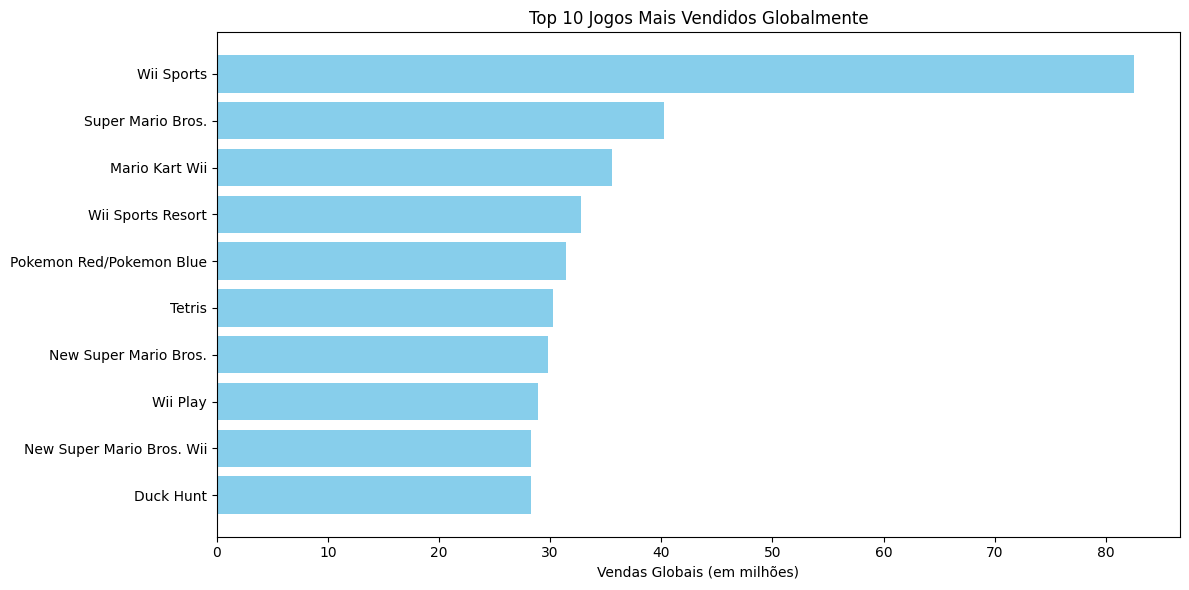

In [12]:
# Selecionar os 10 jogos mais vendidos
top_10 = df.sort_values(by='total_sales', ascending=False).head(10)

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10['name'], top_10['total_sales'], color='skyblue')
plt.xlabel('Vendas Globais (em milhões)')
plt.title('Top 10 Jogos Mais Vendidos Globalmente')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

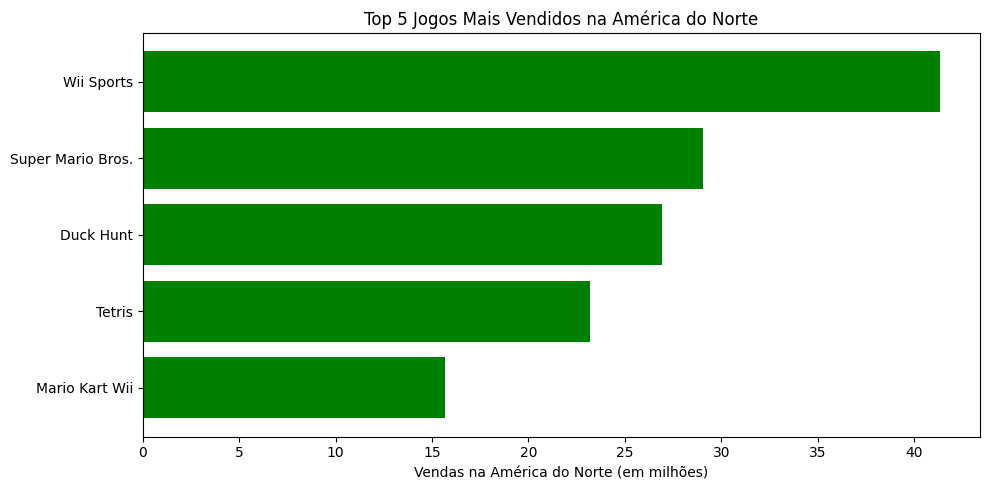

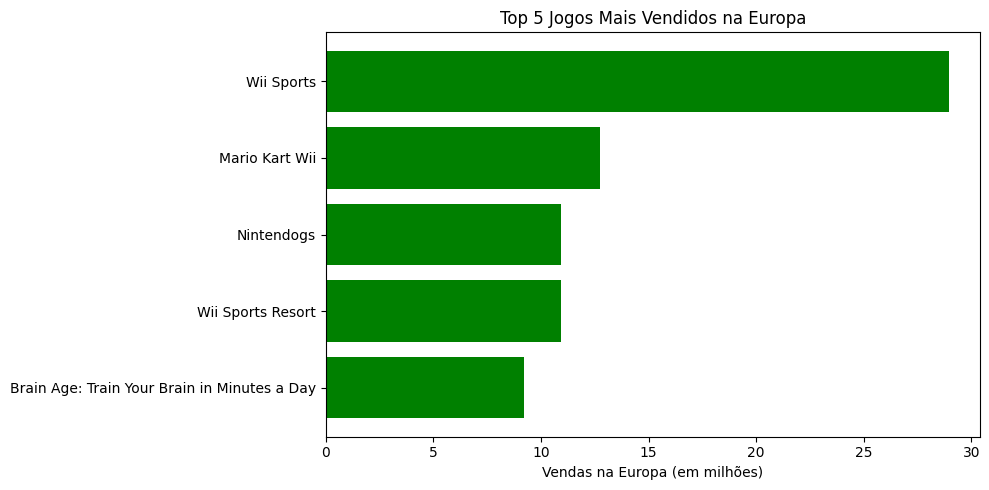

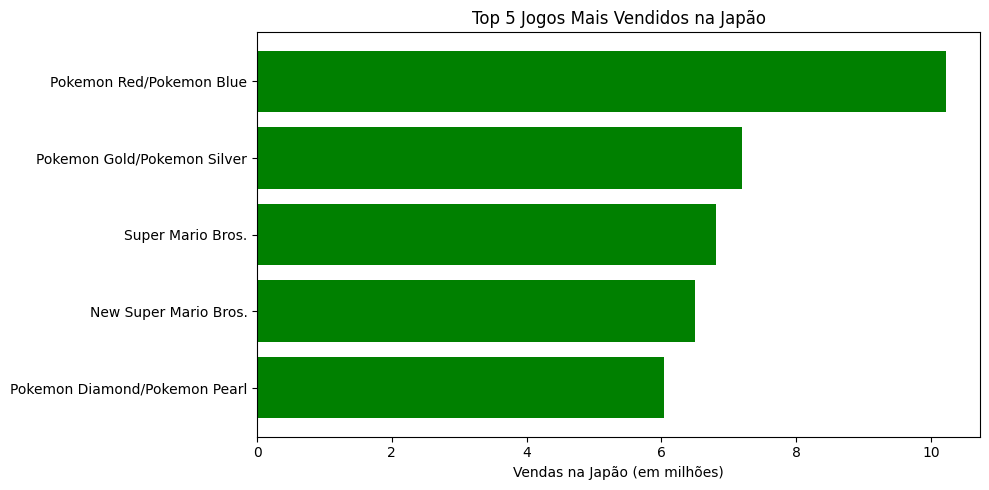

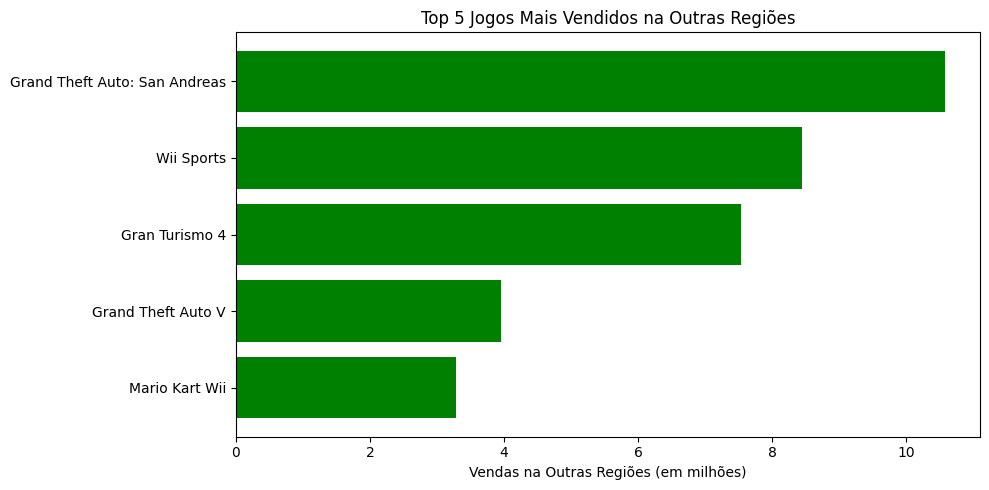

In [13]:
# Gráfico dos 5 jogos mais vendidos por região
def plot_top_5_sales_by_region(region_column, region_label):
    top_5 = df.sort_values(by=region_column, ascending=False).head(5)
    
    plt.figure(figsize=(10, 5))
    plt.barh(top_5['name'], top_5[region_column], color='green')
    plt.xlabel(f'Vendas na {region_label} (em milhões)')
    plt.title(f'Top 5 Jogos Mais Vendidos na {region_label}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Gráficos para cada região
plot_top_5_sales_by_region('na_sales', 'América do Norte')
plot_top_5_sales_by_region('eu_sales', 'Europa')
plot_top_5_sales_by_region('jp_sales', 'Japão')
plot_top_5_sales_by_region('other_sales', 'Outras Regiões')

## Visualização das Vendas por Região
Para entender o desempenho regional dos jogos, criei gráficos de barras horizontais mostrando os 5 jogos mais vendidos em cada uma das principais regiões:
América do Norte, Europa, Japão e Outras Regiões.
Cada gráfico mostra os títulos com maior número de unidades vendidas (em milhões) em sua respectiva região. Essa visualização permite identificar preferências regionais e comparar quais jogos tiveram maior impacto em diferentes mercados ao redor do mundo.

## Etapa 3. Análise dos Dados

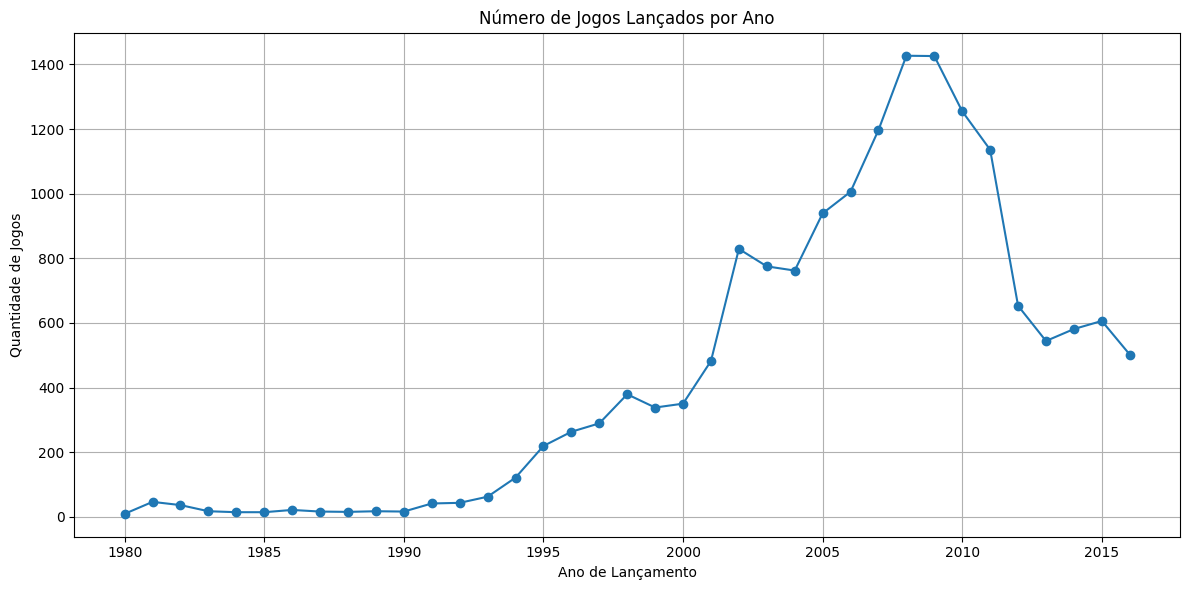

In [14]:
# Contar quantos jogos foram lançados por ano
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year_fixed = games_per_year.dropna()
years = games_per_year_fixed.index.to_numpy(dtype='int32')
counts = games_per_year_fixed.values.astype('int')

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o')
plt.title('Número de Jogos Lançados por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.grid(True)
plt.tight_layout()
plt.show()

## Breve conclusão sobre o gráfico
O número de lançamentos cresceu fortemente até 2008–2010, com mais de mil jogos por ano. A partir de 2012, houve uma queda contínua.
Os anos finais (como 2016) podem estar incompletos e não devem ser interpretados como queda real de mercado sem mais contexto.

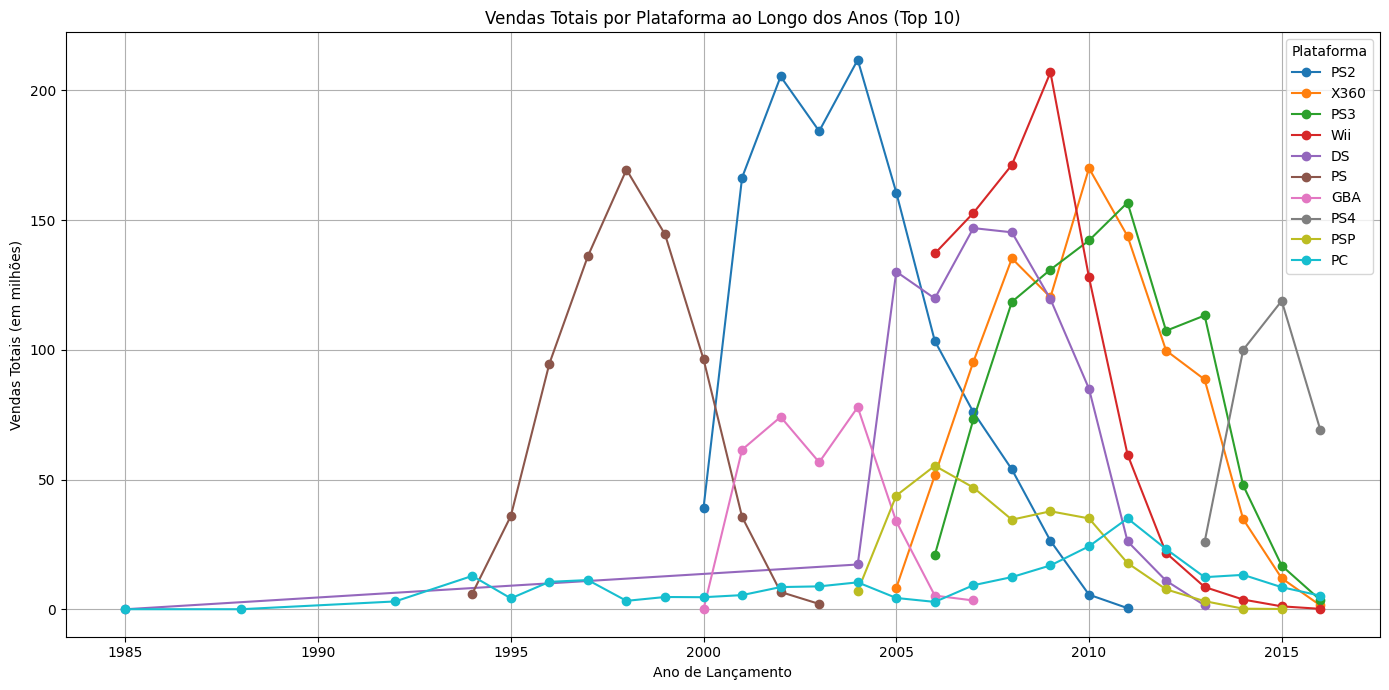

In [15]:
# Calcular vendas totais por plataforma
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionar as plataformas com maiores vendas (ex: top 10)
top_platforms = platform_sales.head(10).index

# Criar top_df com os dados dessas plataformas
top_df = df[df['platform'].isin(top_platforms)]

# Criar um gráfico de linhas individuais para cada plataforma 
plt.figure(figsize=(14, 7))

for platform in top_platforms:
    yearly_sales = top_df[top_df['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label=platform)

plt.title('Vendas Totais por Plataforma ao Longo dos Anos (Top 10)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusão:
Algumas plataformas, como PS2, Wii e DS, dominaram as vendas em seus respectivos períodos.
Outras, como PS3 e X360, surgiram depois e também alcançaram grande relevância.
Ao observar o gráfico, é possível notar que uma plataforma leva cerca de 2 a 3 anos para atingir o pico de vendas, e o ciclo de vida tende a durar entre 6 e 10 anos.
Após esse ciclo, as vendas caem gradualmente e a plataforma deixa de ser relevante comercialmente.

## Definição do Período Relevante para Análise
Com base nas análises anteriores:
O mercado mudou significativamente após 2010. Muitas plataformas antigas já estavam inativas a partir de 2013.
O objetivo é construir um modelo para o ano de 2017, então os dados usados devem refletir os anos imediatamente anteriores.
Decisão:
Usarei os dados de 2013 a 2016 para treinar o modelo. Esses anos fornecem uma amostra recente e confiável do mercado, excluindo dados muito antigos ou incompletos.

In [16]:
# Filtrar os dados para o período de 2013 a 2016
relevant_data = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
print(relevant_data.head())  
print(relevant_data.shape) 

                         name platform  year_of_release         genre  \
,16         Grand Theft Auto V      PS3             2013        Action   
,23         Grand Theft Auto V     X360             2013        Action   
,31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
,33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
,42         Grand Theft Auto V      PS4             2014        Action   
,
,    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
,16      7.02      9.09      0.98         3.96          97.0         8.2   
,23      9.66      5.14      0.06         1.41          97.0         8.1   
,31      6.03      5.86      0.36         2.38           NaN         NaN   
,33      5.28      4.19      4.35         0.78           NaN         NaN   
,42      3.96      6.31      0.38         1.97          97.0         8.3   
,
,   rating  total_sales  
,16      M        21.05  
,23      M        16.27  
,31    NaN        1

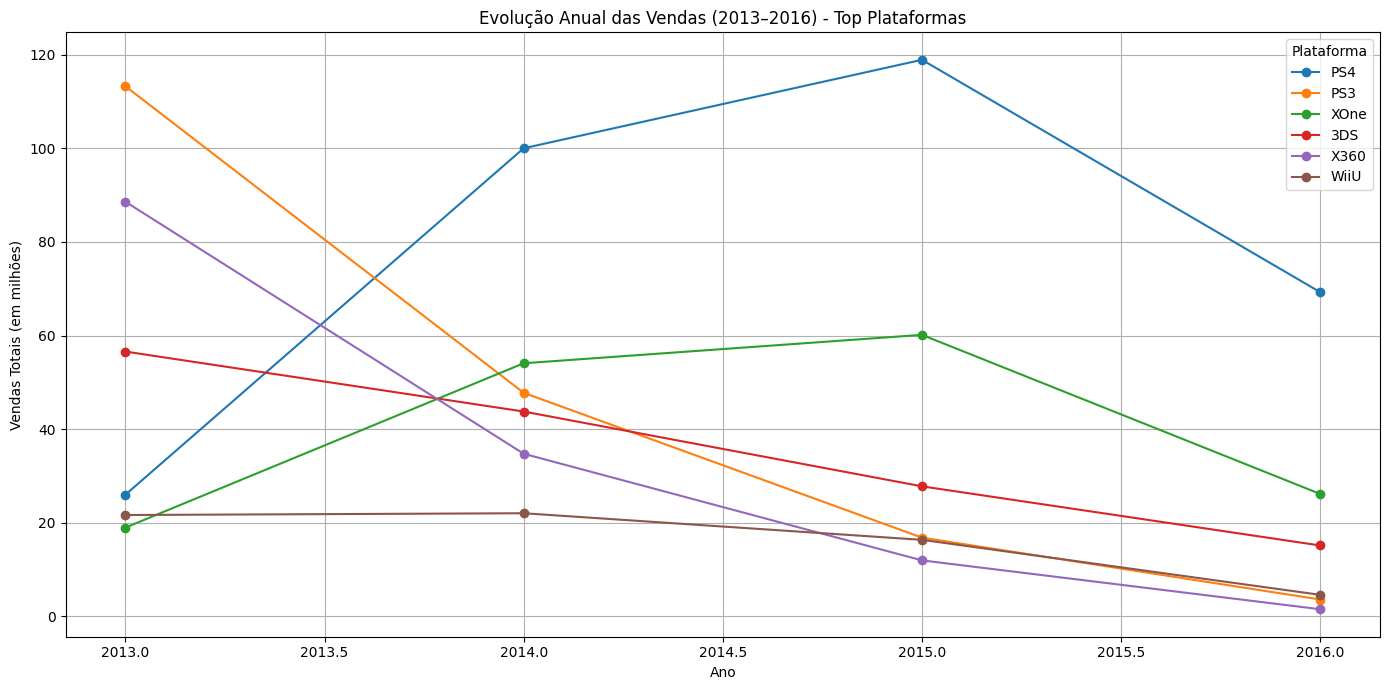

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

In [17]:
# Garantir que o DataFrame filtrado esteja definido
filtered_data = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

# Calcular vendas totais por plataforma nesse período
platform_sales_recent = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Calcular evolução anual das vendas por plataforma
year_platform_sales = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Identificar as plataformas com maiores vendas totais 
top_platforms_recent = platform_sales_recent.head(6).index

# Gráfico de linha para essas plataformas
plt.figure(figsize=(14, 7))
for platform in top_platforms_recent:
    plt.plot(year_platform_sales.index, year_platform_sales[platform], marker='o', label=platform)

plt.title('Evolução Anual das Vendas (2013–2016) - Top Plataformas')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.tight_layout()
plt.show()

# Retornar os dados totais de vendas por plataforma
platform_sales_recent.head(10)

## Principais conclusões:
* PS4 lidera com ampla vantagem (mais de 300 milhões em vendas).
* PS3, X360 e Wii estão claramente em declínio — plataformas de gerações anteriores.
* XOne e 3DS ainda têm desempenho forte, mas estável.
* WiiU teve vendas modestas e também caiu.
* PC tem vendas mais modestas, mas consistentes.

## Plataformas com Maior Potencial de Vendas (2013–2016)
Para identificar as plataformas mais promissoras para o ano de 2017, analisamos as vendas das principais plataformas nos quatro anos anteriores. O gráfico a seguir compara diretamente as vendas por plataforma em cada ano.

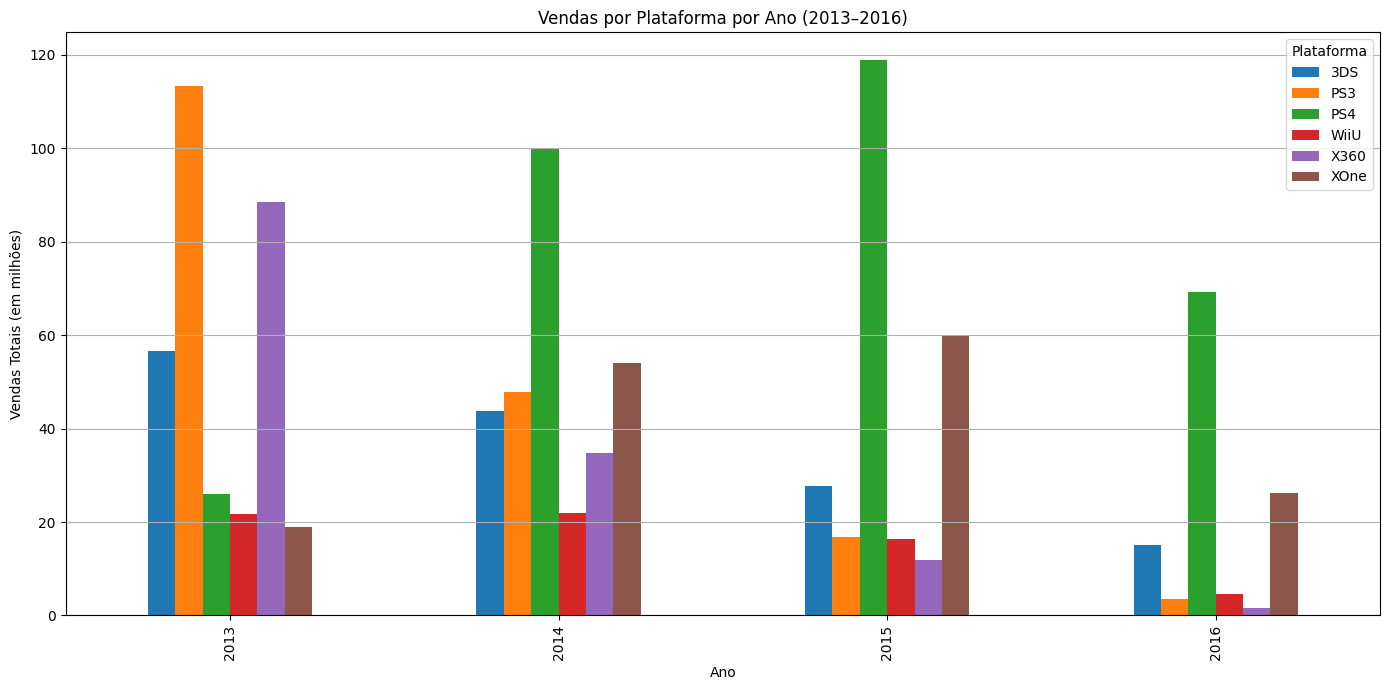

In [18]:
# Selecionar plataformas com maiores vendas totais (top 6)
selected_platforms = platform_sales_recent.head(6).index

# Agrupar dados por ano e plataforma
grouped = (
    filtered_data[filtered_data['platform'].isin(selected_platforms)]
    .groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .unstack()
    .fillna(0)
)

# Criar gráfico de barras agrupadas
grouped.plot(kind='bar', figsize=(14, 7))
plt.title('Vendas por Plataforma por Ano (2013–2016)')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataforma')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Conclusões:
* PS4 mostra forte crescimento e é a plataforma dominante no período.
* PS3, X360 e WiiU estão em queda — são plataformas em fim de vida.
* XOne e 3DS mantêm vendas estáveis, sendo opções ainda relevantes.
* PC tem menor volume absoluto, mas se mantém ativo e consistente.
Plataformas recomendadas para foco em 2017:
* PS4
* XOne
* 3DS
* PC

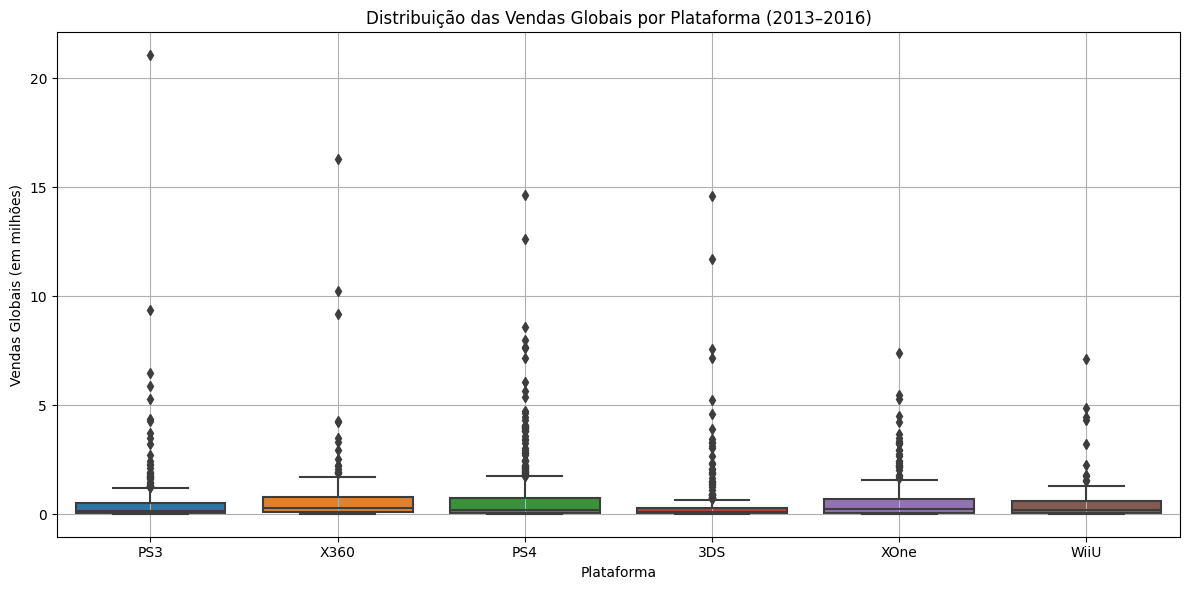

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
WiiU    0.562000
PS3     0.525884
3DS     0.472772
Name: total_sales, dtype: float64

In [19]:
import seaborn as sns

# Selecionar apenas plataformas mais relevantes
box_data = filtered_data[filtered_data['platform'].isin(selected_platforms)]

# Diagrama de caixa 
plt.figure(figsize=(12, 6))
sns.boxplot(data=box_data, x='platform', y='total_sales')
plt.title('Distribuição das Vendas Globais por Plataforma (2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular média de vendas por plataforma
box_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

## Médias de vendas por plataforma:
Plataforma / Média de vendas (milhões) 
* PS4          0.80                      
* X360         0.74                      
* XOne         0.64                      
* WiiU         0.56                      
* PS3          0.53                      
* 3DS          0.47    

## Conclusões:
PS4 tem a maior média de vendas, confirmando seu sucesso comercial no período de 2013 a 2016.
A variação nas vendas é significativa: como mostra o boxplot, todas as plataformas possuem jogos com vendas muito baixas e outros com desempenho excepcional (ex: GTA V, Call of Duty).
As distribuições são assimétricas: a maioria dos jogos vende abaixo de 1 milhão de unidades, enquanto poucos títulos atingem vendas muito altas (outliers).
As plataformas da nova geração (PS4, XOne) se destacam em relação às antigas (PS3, X360), tanto em volume total quanto em desempenho médio.
Descobertas principais:
PS4 lidera tanto em média quanto em vendas totais no período analisado. A maioria dos jogos vende pouco, mas há exceções de grande sucesso em todas as plataformas.
As diferenças entre plataformas são visíveis, e o gráfico de barras por ano reforça que o PS4 e XOne estão em ascensão, enquanto plataformas como PS3, X360 e WiiU estão em declínio.

## Avaliações na performance comercial dos jogos, escolhi a plataforma PS4.
Criei gráficos de dispersão e calculei as correlações entre as avaliações e as vendas.

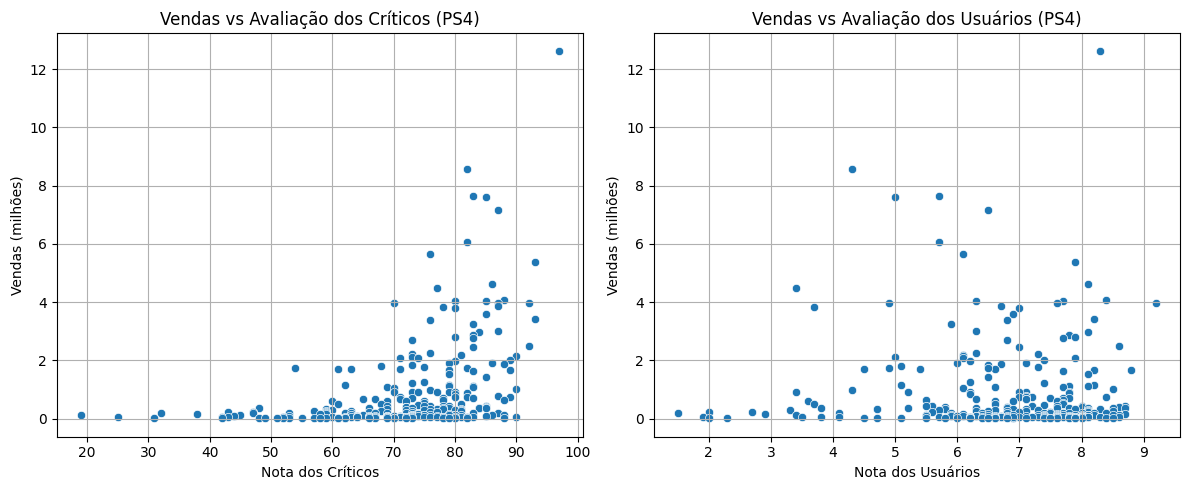

(0.40589480145836687, -0.03362497596528878)

In [20]:
# Escolher uma plataforma popular — usei PS4 (líder de vendas)
ps4_data = filtered_data[filtered_data['platform'] == 'PS4']

# Filtrar apenas dados com avaliações válidas
ps4_rated = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Gráfico de dispersão: avaliações dos críticos vs vendas
plt.figure(figsize=(12, 5))

# Gráfico 1: Críticos
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_rated, x='critic_score', y='total_sales')
plt.title('Vendas vs Avaliação dos Críticos (PS4)')
plt.xlabel('Nota dos Críticos')
plt.ylabel('Vendas (milhões)')
plt.grid(True)

# Gráfico 2: Usuários
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_rated, x='user_score', y='total_sales')
plt.title('Vendas vs Avaliação dos Usuários (PS4)')
plt.xlabel('Nota dos Usuários')
plt.ylabel('Vendas (milhões)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calcular correlações
critic_corr = ps4_rated['total_sales'].corr(ps4_rated['critic_score'])
user_corr = ps4_rated['total_sales'].corr(ps4_rated['user_score'])

critic_corr, user_corr

## Correlação entre avaliações e vendas (PS4):
Críticos vs Vendas: +0.41 → Correlação moderada e positiva
Jogos com notas mais altas de críticos tendem a vender mais.
Usuários vs Vendas: -0.03 → Correlação praticamente nula
Avaliações dos usuários não influenciam significativamente nas vendas.
## Conclusões:
Há uma correlação positiva moderada entre as notas dos críticos e as vendas (≈ +0.41), indicando que boas avaliações da crítica profissional contribuem para o sucesso comercial dos jogos.

Por outro lado, a avaliação dos usuários não tem relação significativa com as vendas (≈ –0.03).

Isso sugere que os consumidores podem ser influenciados mais pelo marketing, imprensa especializada e pré-lançamento do que pela opinião pública após o lançamento.

## Comparação de Vendas para Jogos Multiplataforma
Para avaliar o impacto de um jogo estar disponível em múltiplas plataformas, analisamos os 5 títulos multiplataforma com maiores vendas no período de 2013 a 2016.

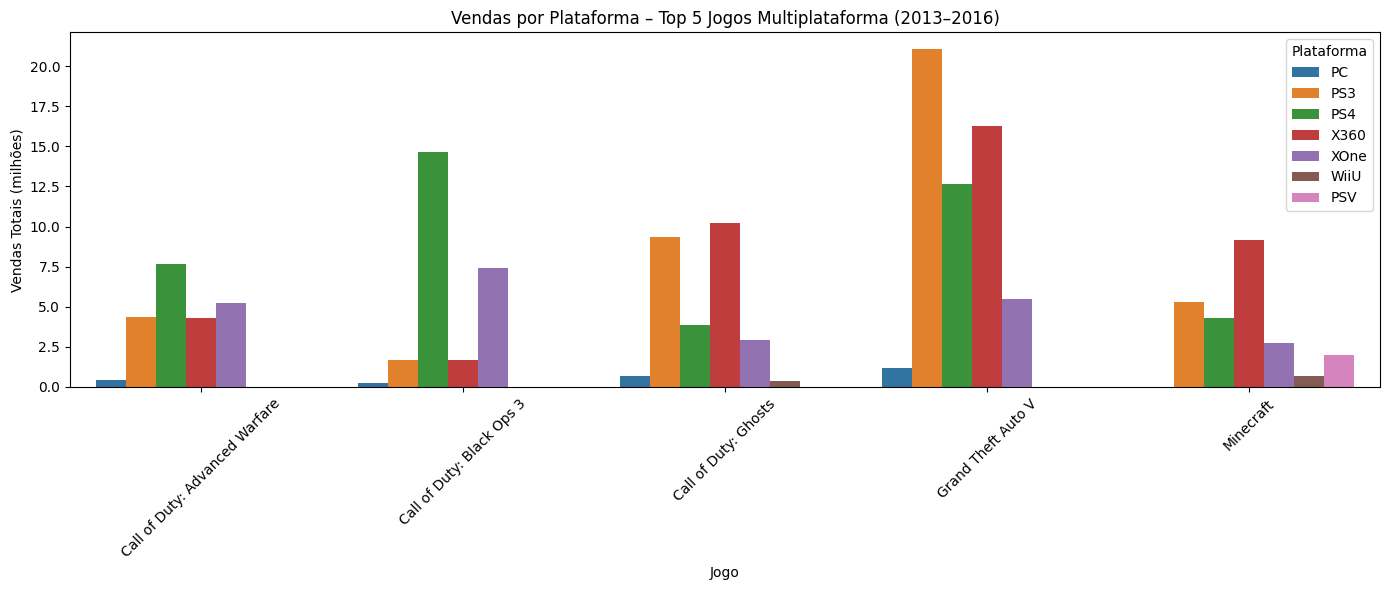

In [21]:
# Encontrar jogos com o mesmo nome lançados em mais de uma plataforma
multi_platform_titles = (
    filtered_data.groupby('name')['platform'].nunique()
    .reset_index()
    .query('platform > 1')['name']
)

# Filtrar apenas esses jogos
multi_platform_data = filtered_data[filtered_data['name'].isin(multi_platform_titles)]

# Selecionar os mais vendidos
top_multi = (
    multi_platform_data.groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

# Escolher os 5 jogos multiplataforma mais vendidos no total (somando todas as plataformas)
top_games = (
    top_multi.groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar apenas esses 5 jogos para visualização
top_multi_filtered = top_multi[top_multi['name'].isin(top_games)]

# Criar gráfico comparando vendas por plataforma para os 5 jogos multiplataforma
plt.figure(figsize=(14, 6))
sns.barplot(data=top_multi_filtered, x='name', y='total_sales', hue='platform')
plt.title('Vendas por Plataforma – Top 5 Jogos Multiplataforma (2013–2016)')
plt.xlabel('Jogo')
plt.ylabel('Vendas Totais (milhões)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

## Observações:
Os principais sucessos multiplataforma (ex: GTA V) vendem bem em praticamente todas as plataformas disponíveis. Ter versões para mais de uma plataforma aumenta significativamente o alcance e o volume de vendas. PS4 e Xbox (X360/XOne) são geralmente as plataformas com maior participação nesse sucesso.

## Análise de Gêneros
Analis o desempenho de vendas dos jogos agrupados por gênero no período de 2013 a 2016. Abaixo estão os resultados de vendas totais e médias por jogo para cada categoria.

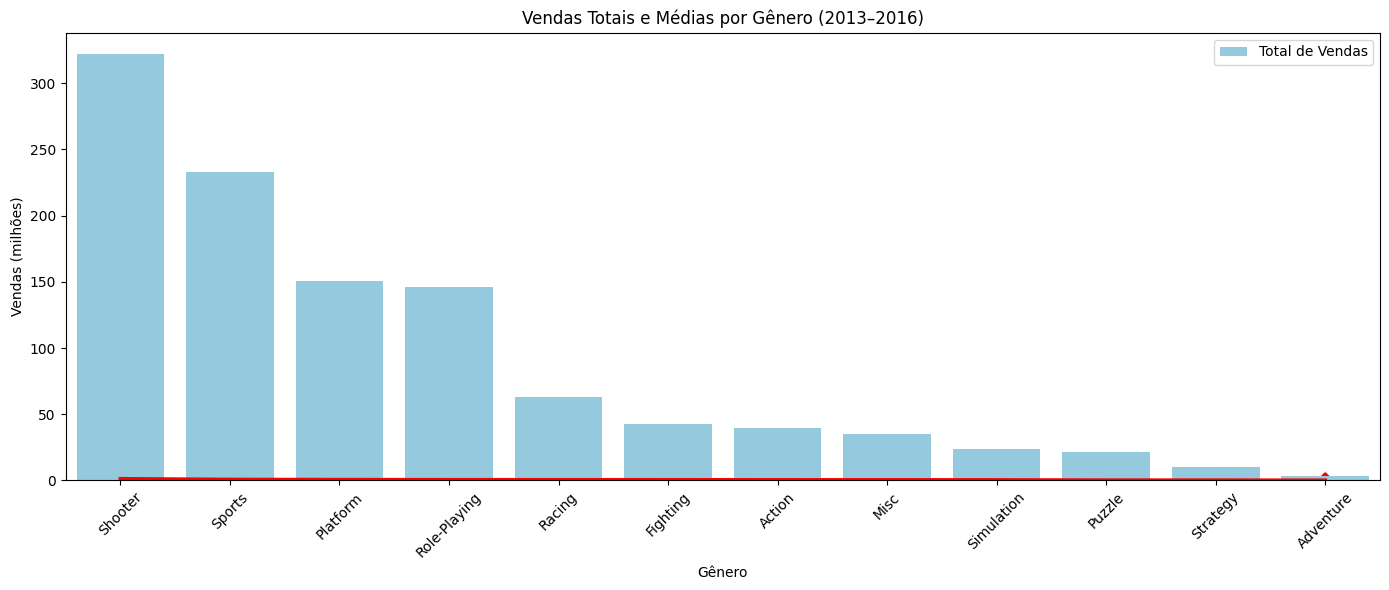

(genre
 Action          321.87
 Shooter         232.98
 Sports          150.65
 Role-Playing    145.89
 Misc             62.82
 Platform         42.63
 Racing           39.89
 Fighting         35.31
 Adventure        23.64
 Simulation       21.76
 Strategy         10.08
 Puzzle            3.17
 Name: total_sales, dtype: float64,
 genre
 Shooter         1.245882
 Sports          0.703972
 Platform        0.576081
 Role-Playing    0.499623
 Racing          0.469294
 Fighting        0.441375
 Action          0.420196
 Misc            0.405290
 Simulation      0.350968
 Puzzle          0.186471
 Strategy        0.180000
 Adventure       0.096490
 Name: total_sales, dtype: float64)

In [22]:
# Filtrar apenas os dados com gêneros válidos
genre_data = filtered_data.dropna(subset=['genre'])

# Calcular média de vendas por gênero
genre_mean_sales = genre_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Calcular total de vendas por gênero
genre_total_sales = genre_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Criar gráfico comparativo
plt.figure(figsize=(14, 6))
sns.barplot(x=genre_total_sales.index, y=genre_total_sales.values, color='skyblue', label='Total de Vendas')
sns.pointplot(x=genre_mean_sales.index, y=genre_mean_sales.values, color='red', label='Média de Vendas', markers='D')

plt.title('Vendas Totais e Médias por Gênero (2013–2016)')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Exibir as tabelas
genre_total_sales, genre_mean_sales

## Conclusões principais:
* Action é o gênero com o maior número de jogos lançados (766), liderando também em vendas totais.
* Shooter se destaca por ter a maior média de vendas por jogo (1,25 milhão), mesmo com menos títulos.
* Sports tem presença forte, com alto volume total e uma média de vendas considerável.
* Role-Playing (RPG) é um gênero com muitos títulos e vendas medianas por jogo.
* Miscellaneous (outros/misturados) tem desempenho intermediário, mas relevante.

## Etapa 4

In [23]:
# Agrupar dados por plataforma e região (vendas absolutas)
platform_sales_by_region = (
    filtered_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
)

# Top 5 plataformas por região
top5_na = platform_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top5_eu = platform_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = platform_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

# Calcular percentuais por região (quotas de mercado)
region_totals = platform_sales_by_region.sum()
platform_market_share = platform_sales_by_region.divide(region_totals, axis=1) * 100

# Exibir resultados
display(top5_na)
display(top5_eu)
display(top5_jp)
display(platform_market_share.loc[top5_na.index.union(top5_eu.index).union(top5_jp.index)])


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

,na_sales,eu_sales,jp_sales
platform,,,
3DS,8.727239,7.893328,48.167353
PS3,14.507322,17.288326,16.586163
PS4,24.842933,35.971241,11.336838
PSV,1.151447,1.555210,13.205001
WiiU,6.673368,5.060806,7.728371
X360,18.656188,10.840578,0.362267
XOne,21.274360,13.152997,0.241512


In [24]:
# Agrupar 5 principais gênero e por região
genre_sales_by_region = (
    filtered_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
)

# Top 5 gêneros por região
top5_na_genres = genre_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top5_eu_genres = genre_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top5_jp_genres = genre_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

# Exibir resultados
display(top5_na_genres)
display(top5_eu_genres)
display(top5_jp_genres)


genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

In [25]:
# Agrupar por classificação ESRB e região
rating_region_sales = (
    filtered_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']]
    .sum()
)

# Remover valores ausentes ou não classificados
rating_region_sales = rating_region_sales.dropna()

# Exibir os dados
display(rating_region_sales)


,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


## Considerações
Analisamos os dados separadamente para América do Norte (NA), Europa (EU) e Japão (JP), com foco nas plataformas, gêneros e classificações ESRB.
Variações nas quotas de mercado:
* PS4 lidera na América do Norte e Europa, mas no Japão perde para consoles portáteis como o 3DS e PSV.
* Xbox (X360 e XOne) tem forte presença na NA e razoável na EU, mas quase nenhuma participação no JP.
* 3DS domina o Japão com grande vantagem, mas aparece de forma mais modesta nas outras regiões.
  
Diferenças regionais:
* Shooters são altamente populares em NA e EU, mas quase irrelevantes no Japão.
* Role-Playing (RPG) domina no Japão, refletindo o gosto por narrativas e estilos orientais.
* Sports têm alta aceitação em NA e EU, mas pouco apelo no JP.
* Gêneros como Fighting e Simulation têm importância apenas no mercado japonês.
  
A classificação ESRB afeta as vendas?
Classificações "M" (Mature) e "E" (Everyone) são as mais lucrativas na América do Norte e Europa.
"T" (Teen) tem vendas intermediárias e presença constante.
No Japão, o impacto da classificação ESRB é quase nulo, pois o sistema não é o principal padrão de classificação adotado no país.
Conclusão:
Sim, a classificação ESRB influencia diretamente as vendas nas regiões ocidentais (NA, EU). No Japão, essa influência é irrelevante, pois há preferências locais e uso de classificações diferentes (como o sistema CERO).

## Etapa 5 - Testando as Hipóteses

In [26]:
from scipy.stats import ttest_ind

# Filtrar dados com user_score válido
valid_scores = filtered_data.dropna(subset=['user_score'])

# Hipótese 1: comparação entre Xbox One e PC
xone_scores = valid_scores[valid_scores['platform'] == 'XOne']['user_score']
pc_scores = valid_scores[valid_scores['platform'] == 'PC']['user_score']

# Hipótese 2: comparação entre Action e Sports
action_scores = valid_scores[valid_scores['genre'] == 'Action']['user_score']
sports_scores = valid_scores[valid_scores['genre'] == 'Sports']['user_score']

# Definir alfa
alpha = 0.05

# Teste t independente para ambas as hipóteses
test1 = ttest_ind(xone_scores, pc_scores, equal_var=False)
test2 = ttest_ind(action_scores, sports_scores, equal_var=False)

test1.pvalue, test2.pvalue

(0.14759594013430463, 1.4460039700704315e-20)

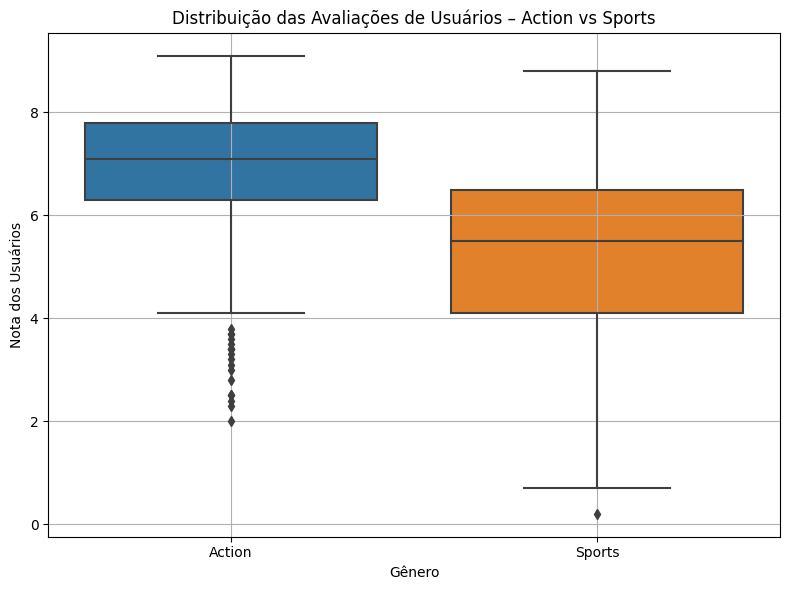

In [27]:
# Criar boxplots para visualizar diferenças nas notas dos usuários por gênero
import seaborn as sns
import matplotlib.pyplot as plt

# Usando apenas Action e Sports
genre_subset = valid_scores[valid_scores['genre'].isin(['Action', 'Sports'])]

plt.figure(figsize=(8, 6))
sns.boxplot(data=genre_subset, x='genre', y='user_score')
plt.title('Distribuição das Avaliações de Usuários – Action vs Sports')
plt.xlabel('Gênero')
plt.ylabel('Nota dos Usuários')
plt.grid(True)
plt.tight_layout()
plt.show()

## Hipóteses

Hipótese 1 – Xbox One vs PC:

H₀ (nula): As médias das avaliações de usuários para jogos de Xbox One e PC são iguais.
H₁ (alternativa): As médias são diferentes.

Hipótese 2 – Action vs Sports:

H₀ (nula): As médias das avaliações de usuários para jogos dos gêneros Action e Sports são iguais.
H₁ (alternativa): As médias são diferentes.

O nível de significância α = 0.05 representa a probabilidade máxima de cometer um erro tipo I, ou seja, rejeitar a hipótese nula (H₀) quando ela é verdadeira.
Isso significa que estamos dispostos a aceitar um erro tipo I (rejeitar H₀ quando ela é verdadeira) em no máximo 5% dos casos. O valor 0.05 oferece um bom equilíbrio é um padrão amplamente aceito e adequado para análises exploratórias.
* Xbox One e PC têm avaliações médias estatisticamente semelhantes, ou seja, não há evidência de diferença nas opiniões dos usuários.
* Já entre os gêneros Action e Sports, existe uma diferença estatisticamente significativa nas médias — os jogadores avaliam esses dois tipos de jogos de forma diferente.

## Etapa 6 Conclusão geral dos Dados

# Projeto de Análise de Vendas de Jogos

**Objetivo:**  
Este projeto teve como objetivo analisar dados de vendas de jogos de videogame em diferentes regiões do mundo, identificando padrões de consumo, plataformas populares, gêneros mais vendidos e como fatores como notas de usuários, críticas e classificação etária podem influenciar no sucesso comercial de um jogo.

**Período analisado:**  
Foco em dados recentes de **2013 a 2016**, com atenção ao fato de que os dados de 2016 podem estar incompletos.

**Base de dados:**  
O arquivo `games.csv` contém informações sobre mais de 16 mil jogos, com colunas como:

- `name`: Nome do jogo  
- `platform`: Plataforma (ex: PS4, X360, PC)  
- `year_of_release`: Ano de lançamento  
- `genre`: Gênero do jogo  
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales`: Vendas regionais (em milhões USD)  
- `critic_score`: Nota da crítica especializada (0–100)  
- `user_score`: Nota dos usuários (0–10)  
- `rating`: Classificação etária ESRB (E, T, M etc.)

A análise dos dados revelou insights valiosos sobre o comportamento do mercado global de games nos últimos anos:

* Plataformas
PS4 é a plataforma dominante em vendas globais no período analisado.

Xbox One se mostra competitivo na América do Norte e Europa, mas tem presença irrelevante no Japão.

Consoles portáteis, como 3DS e PSV, continuam fortes especialmente no mercado japonês, onde o consumo é mais voltado ao estilo portátil e local.

PS3 e X360 ainda aparecem nas vendas, mas mostram sinais claros de declínio.

* Gêneros
Shooters, Action e Sports são os gêneros mais lucrativos, especialmente no Ocidente.

* Role-Playing (RPG) lidera no Japão, reforçando a preferência cultural por narrativas e estilos tradicionais locais.

* Gêneros como Fighting, Simulation e Strategy apresentam menor volume de vendas e são mais nichados.

Diferenças regionais:
América do Norte e Europa compartilham perfis semelhantes de consumo, com domínio de Shooter, Sports e Action.

O Japão tem comportamento distinto: prefere RPGs, jogos de luta e consoles portáteis, e apresenta vendas menores para gêneros como Shooter.

As classificações ESRB afetam diretamente as vendas no Ocidente, mas não têm relevância perceptível no Japão.

Avaliações e comportamento do consumidor
Notas da crítica especializada têm correlação moderada com as vendas — ou seja, boas críticas podem impulsionar o desempenho comercial.

Notas dos usuários não apresentam relação significativa com as vendas, o que indica que decisões de compra são mais influenciadas por marketing, franquias e reputação anterior.

Testes de hipótese mostraram que:
* As avaliações médias de Xbox One e PC são estatisticamente iguais.
* Já as avaliações de gêneros Action e Sports são significativamente diferentes.
Considerações finais
Com base nesses achados, é possível traçar estratégias de mercado mais assertivas, como:
* Investir em Shooter e Sports para mercados ocidentais.
* Apostar em RPGs e portáteis para o Japão.
* Lançar jogos em múltiplas plataformas para potencializar o alcance e aumentar o volume de vendas.
* Utilizar críticas especializadas como ferramenta estratégica de divulgação.